### Завдання. Знайти чисельні розв’язки таких граничних задач для звичайних диференціальних рівнянь другого порядку

<p>2)y'' - e^x y' + y*cos(x) = x
<p>y(0) = 1, y(π) = 0

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

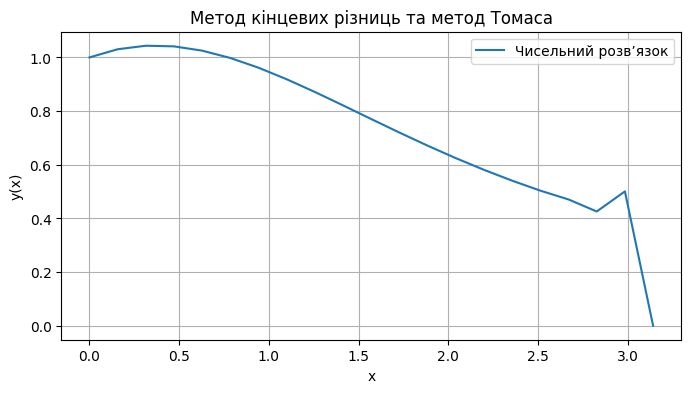

 x	 y(x)
---------------
0.0000	 1.0000
0.1571	 1.0304
0.3142	 1.0436
0.4712	 1.0412
0.6283	 1.0252
0.7854	 0.9979
0.9425	 0.9616
1.0996	 0.9186
1.2566	 0.8711
1.4137	 0.8211


In [ ]:
a = 0.0
b = math.pi
y0 = 1.0
yN = 0.0
N = 20            
h = (b - a) / N

x = np.linspace(a, b, N + 1)

M = N - 1
xs = x[1:-1]

# Ініціалізація коефіцієнтів тридіагональної системи
a_diag = np.zeros(M)   
b_diag = np.zeros(M) 
c_diag = np.zeros(M)  
d = np.zeros(M) 

for i, xi in enumerate(xs):
    a_diag[i] = 1 + math.exp(xi) * h / 2
    b_diag[i] = -2 + (h ** 2) * math.cos(xi)
    c_diag[i] = 1 - math.exp(xi) * h / 2
    d[i] = (h ** 2) * xi


d[0] -= a_diag[0] * y0
d[-1] -= c_diag[-1] * yN

# Метод Томаса
cp = np.zeros(M)
dp = np.zeros(M)

cp[0] = c_diag[0] / b_diag[0]
dp[0] = d[0] / b_diag[0]

for i in range(1, M):
    denom = b_diag[i] - a_diag[i] * cp[i - 1] 

    cp[i] = c_diag[i] / denom
    dp[i] = (d[i] - a_diag[i] * dp[i - 1]) / denom

y_internal = np.zeros(M)
y_internal[-1] = dp[-1]
for i in range(M - 2, -1, -1):
    y_internal[i] = dp[i] - cp[i] * y_internal[i + 1]

y = np.zeros(N + 1)
y[0] = y0
y[1:-1] = y_internal
y[-1] = yN


plt.figure(figsize=(8, 4))
plt.plot(x, y, label='Чисельний розв’язок')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title("Метод кінцевих різниць та метод Томаса")
plt.grid(True)
plt.legend()
plt.show()


print(" x\t y(x)")
print("-" * 15)
for i in range(10):
    print(f"{x[i]:.4f}\t {y[i]:.4f}")

